### PyTorch DataLoader Exercises

Welcome to the PyTorchDataLoader exercise template notebook.

There are several questions in this notebook and it's your goal to answer them by writing Python and PyTorch code.

> **Note:** There may be more than one solution to each of the exercises, don't worry too much about the *exact* right answer. Try to write some code that works first and then improve it if you can.



In [6]:
# Import necessary libraries
import os
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
import requests
from zipfile import ZipFile
from io import BytesIO
import numpy as np

# Define the path to the dataset
dataset_path = 'http://cs231n.stanford.edu/tiny-imagenet-200.zip'  # Replace with the path to your dataset

# Send a GET request to the URL
response = requests.get(dataset_path)
# Check if the request was successful
if response.status_code == 200:
    # Open the downloaded bytes and extract them
    with ZipFile(BytesIO(response.content)) as zip_file:
        zip_file.extractall('/dataset')
    print('Download and extraction complete!')

# Define transformations for the dataset
transform = transforms.Compose([
    transforms.Resize((64, 64)),   # Resize the images to a standard size (e.g., 64x64)
    transforms.ToTensor(),         # Convert the image to a PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize with ImageNet stats
])

# Load the dataset
tiny_imagenet_dataset_train = ImageFolder(root='/dataset/tiny-imagenet-200/train', transform=transform)
tiny_imagenet_dataset_test = ImageFolder(root='/dataset/tiny-imagenet-200/test', transform=transform)

# Create a DataLoader
dataloader_train = DataLoader(tiny_imagenet_dataset_train, batch_size=32, shuffle=True)
dataloader_test =  DataLoader(tiny_imagenet_dataset_test, batch_size=32, shuffle=True)

# Determine the number of classes and samples
num_classes = len(tiny_imagenet_dataset_train.classes)
num_samples = len(tiny_imagenet_dataset_train)

print(f'Number of classes: {num_classes}')
print(f'Number of samples: {num_samples}')


Download and extraction complete!
Number of classes: 200
Number of samples: 100000


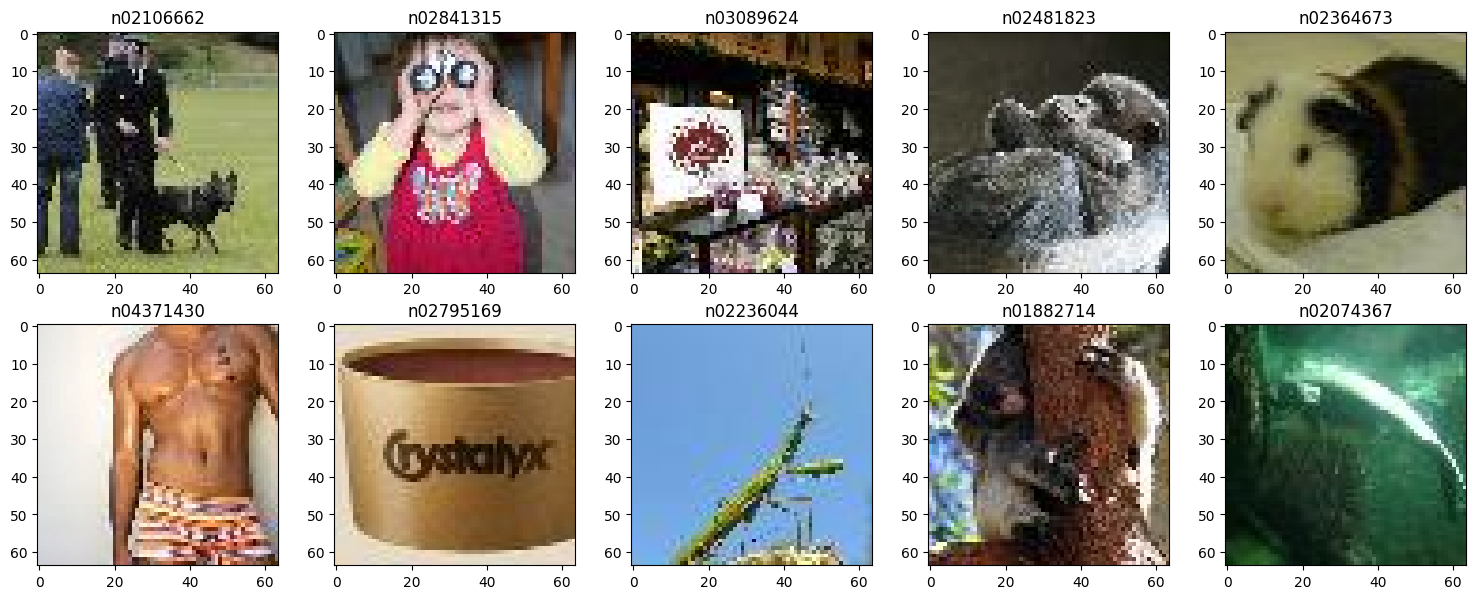

In [14]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt
import numpy as np

# Function to denormalize image for visualization
def denormalize(image):
    # Convert from tensor to numpy and reorder dimensions (C x H x W -> H x W x C)
    image = image.to('cpu').numpy().transpose((1, 2, 0))

    # ImageNet mean and std for denormalization
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])

    # Denormalize using ImageNet's mean and std
    image = image * std + mean

    # Clip values between 0 and 1 for proper visualization
    image = np.clip(image, 0, 1)

    return image

# Visualize one example for each class for 10 classes
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()  # Flatten the axes array for easy indexing

classes_sampled = []
found_classes = 0

for i, (inputs, labels) in enumerate(dataloader_train):
    # Iterate over each image in the current batch
    for idx, class_label in enumerate(labels):
        # Check if we've already found 10 unique classes
        if found_classes >= 10:
            break

        class_name = tiny_imagenet_dataset_train.classes[class_label.item()]  # Get class name from the class label

        # If the class hasn't been sampled yet
        if class_name not in classes_sampled:
            # Select the first image in the batch with the current class label
            image = inputs[idx]  # Select the image at the index corresponding to class_label

            # Denormalize the image for visualization
            image = denormalize(image)

            # Plot the image
            axes[found_classes].imshow(image)
            axes[found_classes].set_title(class_name)
            axes[found_classes].axis('on')  # Hide axes for better visualization , i like axes so i used it

            # Update the list of sampled classes and the found_classes counter
            classes_sampled.append(class_name)
            found_classes += 1

    # Stop if we have found 10 classes
    if found_classes >= 10:
        break

plt.tight_layout()
plt.show()
